<a href="https://colab.research.google.com/github/GeulHae/GeulHae/blob/main/230327_1W_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 (Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나

- 구글이 주도적으로 개발하는 플랫폼

- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원


- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤 -> 빠르게 연산이 가능

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
print(tf .__version__)

2.11.0


### 텐서(Tensor)의 객체

- Matrix 의 확장 버전

- 타입(Type): `string`, `float32`, `float16`, `int32`, `int8` 등

- 형상(Shape): 0, 1, 2차원 등의 데이터 차원 

- 축(Rank): 차원의 개수

### 텐서의 차원과 연산

In [ ]:
# 상수 텐서 선언 ( scalr )

a = tf.constant(2)
print('rank', tf.rank(a))
print(a)

rank tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
# 1차원 텐서 선언

a = tf.constant([1, 2])
print('rank', tf.rank(a))
print(a)

rank tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)


In [ ]:
# 2차원 텐서 선언

a = tf.constant([[2,3], [4,5]])
print('rank', tf.rank(a))
print(a)

rank tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [ ]:
# string type 텐서 선언

a = tf.constant(['Hello, HERA'])
print('rank', tf.rank(a))
print(a)

rank tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([b'Hello, HERA'], shape=(1,), dtype=string)


### 난수 생성

In [ ]:
# uniform distribution (균일 분포)
# ([shape], min_value, max_value)

rand = tf.random.uniform([1], 0, 1)
print(rand.shape)
print(rand)

(1,)
tf.Tensor([0.4543401], shape=(1,), dtype=float32)


In [ ]:
# 정규분포
# ([shape], 평균, 표준편차)

rand = tf.random.normal([1,2], 0, 1)
print(rand.shape)
print(rand)

(1, 2)
tf.Tensor([[-1.5464461  0.6224141]], shape=(1, 2), dtype=float32)


### +, -, *, /

In [ ]:
a = tf.constant(3)
b = tf.constant(2)

In [ ]:
print(a + b)
print(tf.add(a, b))

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)


In [ ]:
print(a - b)
print(tf.subtract(a, b))

tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print(a * b)
print(tf.multiply(a, b))

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [ ]:
print(a / b)
print(tf.divide(a, b))

tf.Tensor(1.5, shape=(), dtype=float64)
tf.Tensor(1.5, shape=(), dtype=float64)


### 텐서 플로우 ↔ 넘파이
- `numpy()`
- `tf.convet_to_tensor()`

In [ ]:
c = tf.add(a, b)
print(c)
print(type(c))

tf.Tensor(5, shape=(), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
c = tf.add(a, b).numpy()

print(c)
print(type(c))

# 5
# <class 'numpy.int32'>

5
<class 'numpy.int32'>


In [ ]:
c_square = np.square(c, dtype=np.float32)

print(c_square)
print(type(c_square))

# 25.0
# <class 'numpy.float32'>

25.0
<class 'numpy.float32'>


In [ ]:
c_tensor = tf.convert_to_tensor(c_square)

print(c_tensor)
print(type(c_tensor))

# tf.Tensor(25.0, shape=(), dtype=float32)
# <class 'tensorflow.python.framework.ops.EagerTensor'>

tf.Tensor(25.0, shape=(), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


### 슬라이싱

In [ ]:
t = tf.constant([[1., 2., 3.,], [4., 5., 6.]])
print(t)

# [[1, 2, 3]
#  [4, 5, 6]]

# [[2, 3]
#  [5, 6]]

# tf.Tensor(
# [[1. 2. 3.]
#  [4. 5. 6.]], shape=(2, 3), dtype=float32)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [ ]:
print(t[:, 1: ])

# tf.Tensor(
# [[2. 3.]
#  [5. 6.]], shape=(2, 2), dtype=float32)

tf.Tensor(
[[2. 3.]
 [5. 6.]], shape=(2, 2), dtype=float32)


### 타입 변환
- 텐서의 기본 dtype
  - float형 텐서: `float32`
  - int형 텐서: `int32`

- 연산시 텐서의 타입을 맞춰줘야 함
  - `float32` ~ `float32`
  - `int32` ~ `int32`
  - `flot32` ~ `int32` (x)

- 타입변환에는 `tf.cast()` 사용

In [ ]:
a = tf.constant(2)
print(a)

b = tf.constant(2.)
print(b)

# tf.Tensor(2, shape=(), dtype=int32)
# tf.Tensor(2.0, shape=(), dtype=float32)

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
# 연산시 타입을 맞춰줘야 함, Error 발생 
# a + b

tf.constant(2) + tf.constant(2.)


# ---------------------------------------------------------------------------
# InvalidArgumentError                      Traceback (most recent call last)
# <ipython-input-34-5e73f98a350d> in <module>
# ----> 1 tf.constant(2) + tf.constant(2.)

# 1 frames
# /usr/local/lib/python3.9/dist-packages/tensorflow/python/util/traceback_utils.py in error_handler(*args, **kwargs)
#     151     except Exception as e:
#     152       filtered_tb = _process_traceback_frames(e.__traceback__)
# --> 153       raise e.with_traceback(filtered_tb) from None
#     154     finally:
#     155       del filtered_tb

# /usr/local/lib/python3.9/dist-packages/tensorflow/python/framework/ops.py in raise_from_not_ok_status(e, name)
#    7213 def raise_from_not_ok_status(e, name):
#    7214   e.message += (" name: " + name if name is not None else "")
# -> 7215   raise core._status_to_exception(e) from None  # pylint: disable=protected-access
#    7216 
#    7217 

# InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2]

InvalidArgumentError: ignored

In [ ]:
# 검색 = google 텐서플로우 형변환  # cast 

# 기존 b # tf.Tensor(2.0, shape=(), dtype=float32)
print(b)

# Type 변환 메소드 tf.cast (변환하고싶은 변수, 바꿀 타입)
b = tf.cast(b, tf.int32)
print(b)


# tf.Tensor(2.0, shape=(), dtype=float32)
# tf.Tensor(2, shape=(), dtype=int32)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2, shape=(), dtype=int32)


In [ ]:
a + b

# <tf.Tensor: shape=(), dtype=int32, numpy=4>

<tf.Tensor: shape=(), dtype=int32, numpy=4>

### 변수 생성

- `tf.Variable`
- 딥러닝 모델 학습 시, 그래프 연산이 필요할 때 사용

In [ ]:
# constant 와 크게 차이가 없다. / 좀 더 심화 하면 런타임, 리소스에서 차이
# constant = 상수  Variable = 변수

x = tf.Variable(20.0)
print(x)

# <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


# heart attack

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [44]:
#heart attack prediction 데이터셋 읽기 (함수화(readData()) 해서 실행하는 코드)
# index_col => Unname 안생기고 생성 가능
# 파일 오른쪽 ... 클릭 & 경로복사

def readData():
  heart = pd.read_csv('/content/heart.csv', index_col=0)
  return heart

In [45]:
heart = readData()

#나이, 성별, Chest pain type, blood pressure....
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [48]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#데이터셋 분류 - train/test
def makeXY(data):
  X = data.iloc[:, :-1].values
  _y = data.iloc[:, -1]
  _y = LabelEncoder().fit_transform(_y) #-> 카테고리형 데이터를 수치형으로 변환
  Y = pd.get_dummies(_y).values
  return train_test_split(X, Y, test_size=0.2, random_state=25)

In [ ]:
#model 작성 ( 노드 수 변경도 해보고 이것저것 바꿔보기!~ )
# 
# 예측값이 0 또는 1, 그래서 노드값이 2
# compile 
# loss = crossentropy / MSE / 등등등 / 분류 문제에서는 categorical이 좀 더 잘 된다고 적용해 봄

def makeModel():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(13,)),
      tf.keras.layers.Dense(2, activation='softmax')])
  model.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
  
  return model

In [ ]:
# model 적중률 측정 Test Set
# 
def heartEvaluate(model, X_test, y_test):
  loss, accuracy = model.evaluate(X_test, y_test)
  return accuracy

In [ ]:
# 데이터 불러와서 , 
# 데이터를 나누고,
# 몇개의 층을 쌓을지,
# comfile해 ( 모델에 맞게 최고의 성능을 내기 위해 계속해서 실험)
# Test 데이터 셋으로 평가
# epochs 무조건 많은게 좋은것 아니다 . overfit

# 훈련
# 평가
# epochs = 100 100번 반복해
# 정확도는 올라가고 loss값은 떨어지고 aproch가 점점점점 올라가는게 그래프로 확인이 가능
# 훈련과정 그림그리기 한번 시키고

def main():
  heart = readData()
  X_train, X_test, y_train, y_test = makeXY(heart)
  model = makeModel()

  hist = model.fit(X_train,
                   y_train,
                   validation_data=(X_test, y_test),
                   epochs=100)
  
  fig, ax = plt.subplots(figsize=(14, 6))
  
  ax.plot(hist.history['accuracy'])
  ax.plot(hist.history['val_accuracy'])
  plt.legend(['accuracy', 'val_accuracy'])

  ax.set_xlabel('X1')
  ax.set_ylabel('X2')
  
  accuracy = heartEvaluate(model, X_test, y_test)
  print('Accuracy = {:.4f}'.format(accuracy))
  result = {'hist':hist, 'accuracy':accuracy}
  return result

Epoch 1/100
8/8 [==============================] - 1s 26ms/step - loss: 0.8766 - accuracy: 0.4504 - val_loss: 0.8006 - val_accuracy: 0.4754
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8058 - accuracy: 0.4504 - val_loss: 0.7393 - val_accuracy: 0.4754
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7419 - accuracy: 0.4876 - val_loss: 0.6884 - val_accuracy: 0.5902
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5000 - val_loss: 0.6647 - val_accuracy: 0.6393
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5909 - val_loss: 0.6620 - val_accuracy: 0.6393
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6710 - accuracy: 0.6116 - val_loss: 0.6576 - val_accuracy: 0.5902
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6240 - val_loss: 0.6468 - val_accuracy: 0.6230
Epoch 8/100
8/8 [=========

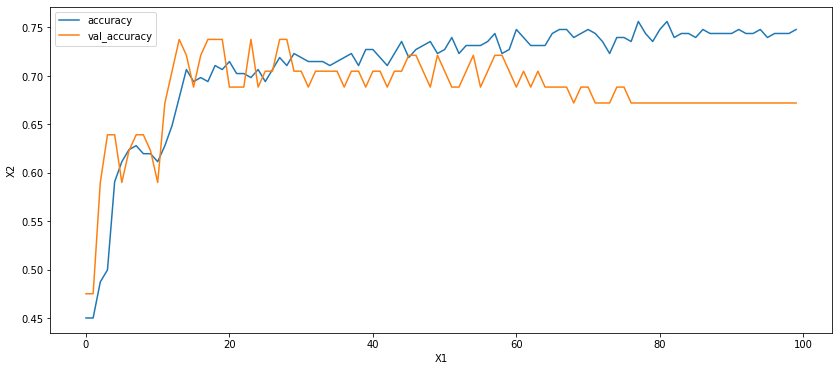

In [ ]:
if __name__ == '__main__':
  main()